<a href="https://colab.research.google.com/github/isaacdavii/Projeto_Analise_de_Materiais_Agricolas/blob/main/Projeto_Materias_Primas_de_Agricultura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Preços das Matérias-Primas Agrícolas (1990-2020)**

* Conteúdo: Este conjunto de dados é composto por preços e variação percentual de
preço para lã grossa, copra (parte seca da polpa do coco), algodão, lã fina, madeira dura, madeira serrada dura, couro, madeira compensada, borracha, madeira macia, madeira serrada macia e celulose.

`Link`: https://www.kaggle.com/datasets/kianwee/agricultural-raw-material-prices-19902020

In [ ]:
# Importando bibliotecas necessárias para a Análise de Dados
import numpy as np
import pandas as pd

**Carregando o conjunto de dados em um quadro de dados usando Pandas**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Agricultura - Data Science/agricultural_raw_material.csv')
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


## **Explorando o conjunto de dados**

Aqui nós abrimos a estrutura em valores para entender do que se trata o nosso conjunto.


In [ ]:
# Traz dados e exemplos da estrutura a fim de auxiliar na compreensão da estrutura de dados que estamos trabalhando
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [ ]:
# Checando valores nulos em cada coluna
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

É possível tratarmos também atualizando a lista de nomes para português para melhor visualização dos dados.

## **Lidar com dados ausentes, incorretos e inválidos**

Neste momento nós fazemos o tratamento dos dados ausentes, incorretos ou inválidos que acabam por atrapalhar nossa análise.

In [ ]:
# Trocando[replacing] %, "," and "-"
df = df.replace('%', '', regex = True)
df = df.replace(',', '', regex = True)
df = df.replace('-', '', regex = True)
df = df.replace('', np.nan) # Tratamos strings vazias como objetos (NaN)
df = df.replace('MAY90', np.nan) # Tratamos esta coluna de mês como ojbeto (NaN)

In [ ]:
# Aqui nós atualizamos o nome das colunas para PT-BR para melhor visualização dos dados
df = df.rename(columns = {'Coarse wool Price': 'Preço da lã grossa',
    'Coarse wool price % Change': 'Variação % do preço da lã grossa',
    'Copra Price': 'Preço da copra',
    'Copra price % Change': 'Variação % do preço da copra',
    'Cotton Price': 'Preço do algodão',
    'Cotton price % Change': 'Variação % do preço do algodão',
    'Fine wool Price': 'Preço da lã fina',
    'Fine wool price % Change': 'Variação % do preço da lã fina',
    'Hard log Price': 'Preço da madeira dura em toras',
    'Hard log price % Change': 'Variação % do preço da madeira dura em toras',
    'Hard sawnwood Price': 'Preço da madeira dura serrada',
    'Hard sawnwood price % Change': 'Variação % do preço da madeira dura serrada',
    'Hide Price': 'Preço do couro',
    'Hide price % change': 'Variação % do preço do couro',
    'Plywood Price': 'Preço do compensado',
    'Plywood price % Change': 'Variação % do preço do compensado',
    'Rubber Price': 'Preço da borracha',
    'Rubber price % Change': 'Variação % do preço da borracha',
    'Softlog Price': 'Preço da madeira mole em toras',
    'Softlog price % Change': 'Variação % do preço da madeira mole em toras',
    'Soft sawnwood Price': 'Preço da madeira mole serrada',
    'Soft sawnwood price % Change': 'Variação % do preço da madeira mole serrada',
    'Wood pulp Price': 'Preço da celulose',
    'Wood pulp price % Change': 'Variação % do preço da celulose'})

In [ ]:
# Eliminando linhas com valores nulos (NaN)
df = df.dropna()

In [ ]:
# Convertendo o tipo de dados para float - temos preços e percentuais
# A análise será mais fluida tratando todos os dados como numéricos iguais
lst = ["Preço da lã grossa",
    "Variação % do preço da lã grossa",
    "Preço da copra",
    "Variação % do preço da copra",
    "Preço do algodão",
    "Variação % do preço do algodão",
    "Preço da lã fina",
    "Variação % do preço da lã fina",
    "Preço da madeira dura em toras",
    "Variação % do preço da madeira dura em toras",
    "Preço da madeira dura serrada",
    "Variação % do preço da madeira dura serrada",
    "Preço do couro",
    "Variação % do preço do couro",
    "Preço do compensado",
    "Variação % do preço do compensado",
    "Preço da borracha",
    "Variação % do preço da borracha",
    "Preço da madeira mole em toras",
    "Variação % do preço da madeira mole em toras",
    "Preço da madeira mole serrada",
    "Variação % do preço da madeira mole serrada",
    "Preço da celulose",
    "Variação % do preço da celulose"]
df[lst] = df[lst].astype("float")
df.dtypes

Preço da lã grossa                              float64
Variação % do preço da lã grossa                float64
Preço da copra                                  float64
Variação % do preço da copra                    float64
Preço do algodão                                float64
Variação % do preço do algodão                  float64
Preço da lã fina                                float64
Variação % do preço da lã fina                  float64
Preço da madeira dura em toras                  float64
Variação % do preço da madeira dura em toras    float64
Preço da madeira dura serrada                   float64
Variação % do preço da madeira dura serrada     float64
Preço do couro                                  float64
Variação % do preço do couro                    float64
Preço do compensado                             float64
Variação % do preço do compensado               float64
Preço da borracha                               float64
Variação % do preço da borracha                 

**Colunas de data e hora**

Tratamos a coluna do mês com 'datetime' e definindo-a como índice para o conjunto de dados. Isto é, colocamos um valor numérico para a coluna de mês.

In [ ]:
df.Month = pd.to_datetime(df.Month.str.upper(), format = '%b%y', yearfirst = False)

# Indexação dos meses
df = df.set_index('Month')

# Depois que rodamos a primeira vez os dados tratados eles ficam salvos

In [ ]:
df.head()

,Preço da lã grossa,Variação % do preço da lã grossa,Preço da copra,Variação % do preço da copra,Preço do algodão,Variação % do preço do algodão,Preço da lã fina,Variação % do preço da lã fina,Preço da madeira dura em toras,Variação % do preço da madeira dura em toras,...,Preço do compensado,Variação % do preço do compensado,Preço da borracha,Variação % do preço da borracha,Preço da madeira mole em toras,Variação % do preço da madeira mole em toras,Preço da madeira mole serrada,Variação % do preço da madeira mole serrada,Preço da celulose,Variação % do preço da celulose
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


## Análise Exploratória e Visualização

Vamos começar importando **matplotlib.pyplot** e **seaborn**.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')
# Colocamos fontes padrão para todos os nossos gráficos
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Mapa de calor

Aqui fazemos um estudo sobre os preços das matérias-primas.

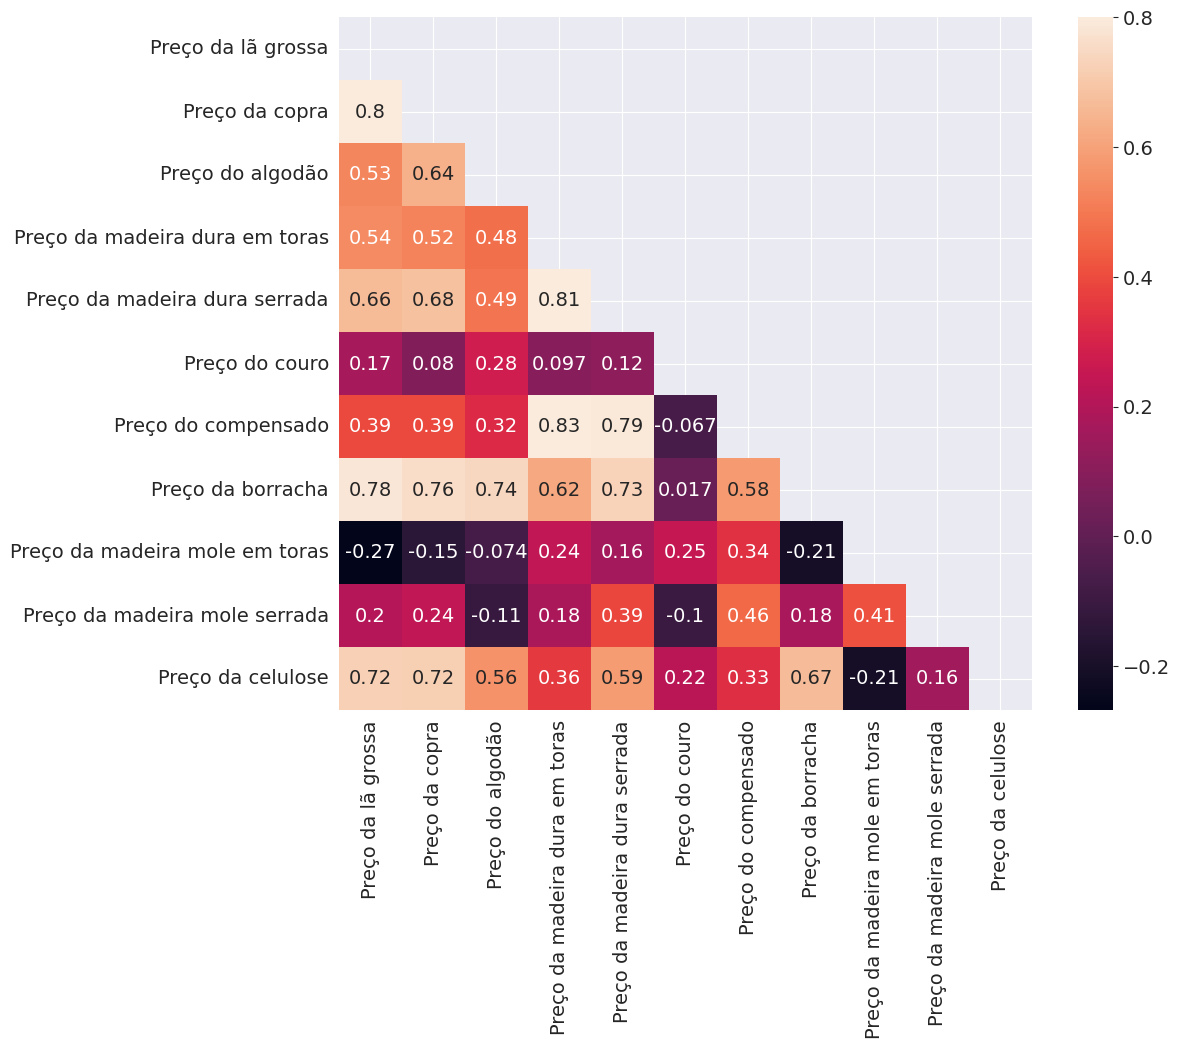

In [ ]:
# Lista de preços das matérias-primas (dados brutos = raw data)
raw_data = ['Preço da lã grossa',
            'Preço da copra','Preço do algodão',
            'Preço da madeira dura em toras',
            'Preço da madeira dura serrada',
            'Preço do couro',
            'Preço do compensado',
            'Preço da borracha',
            'Preço da madeira mole em toras',
            'Preço da madeira mole serrada',
            'Preço da celulose']

# Obtendo a matriz de correlação entre os preços de uma máteria-prima e outra
# Ex: se o aumento do preço de uPreço da madeira dura em toras correlacionado ao aumento/queda de outro
corrmat = df[raw_data].corr()

# Definindo o tamanho do gráfico
fig = plt.figure(figsize = (12, 9))

# Mascarando a parte superior do triângulo, pois a matriz é simétrica
mask = np.triu(np.ones_like(corrmat, dtype = bool))
sns.heatmap(corrmat, vmax = .8, mask = mask, square = True, annot = True)
plt.show()

O mapa de calor mostra a correlação entre as matérias-primas maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas, mas não necessariamente.

Por ex.: vemos uma grande correlação entre o preço da lã fina (fine wool) e a lã grossa (coarse wool).

Explore uma ou mais colunas traçando um gráfico abaixo e adicione alguma explicação sobre ele.

## Matriz de correlação de porcentagem

Aqui realizamos o estudo das variações de porcentagens das matérias-primas.

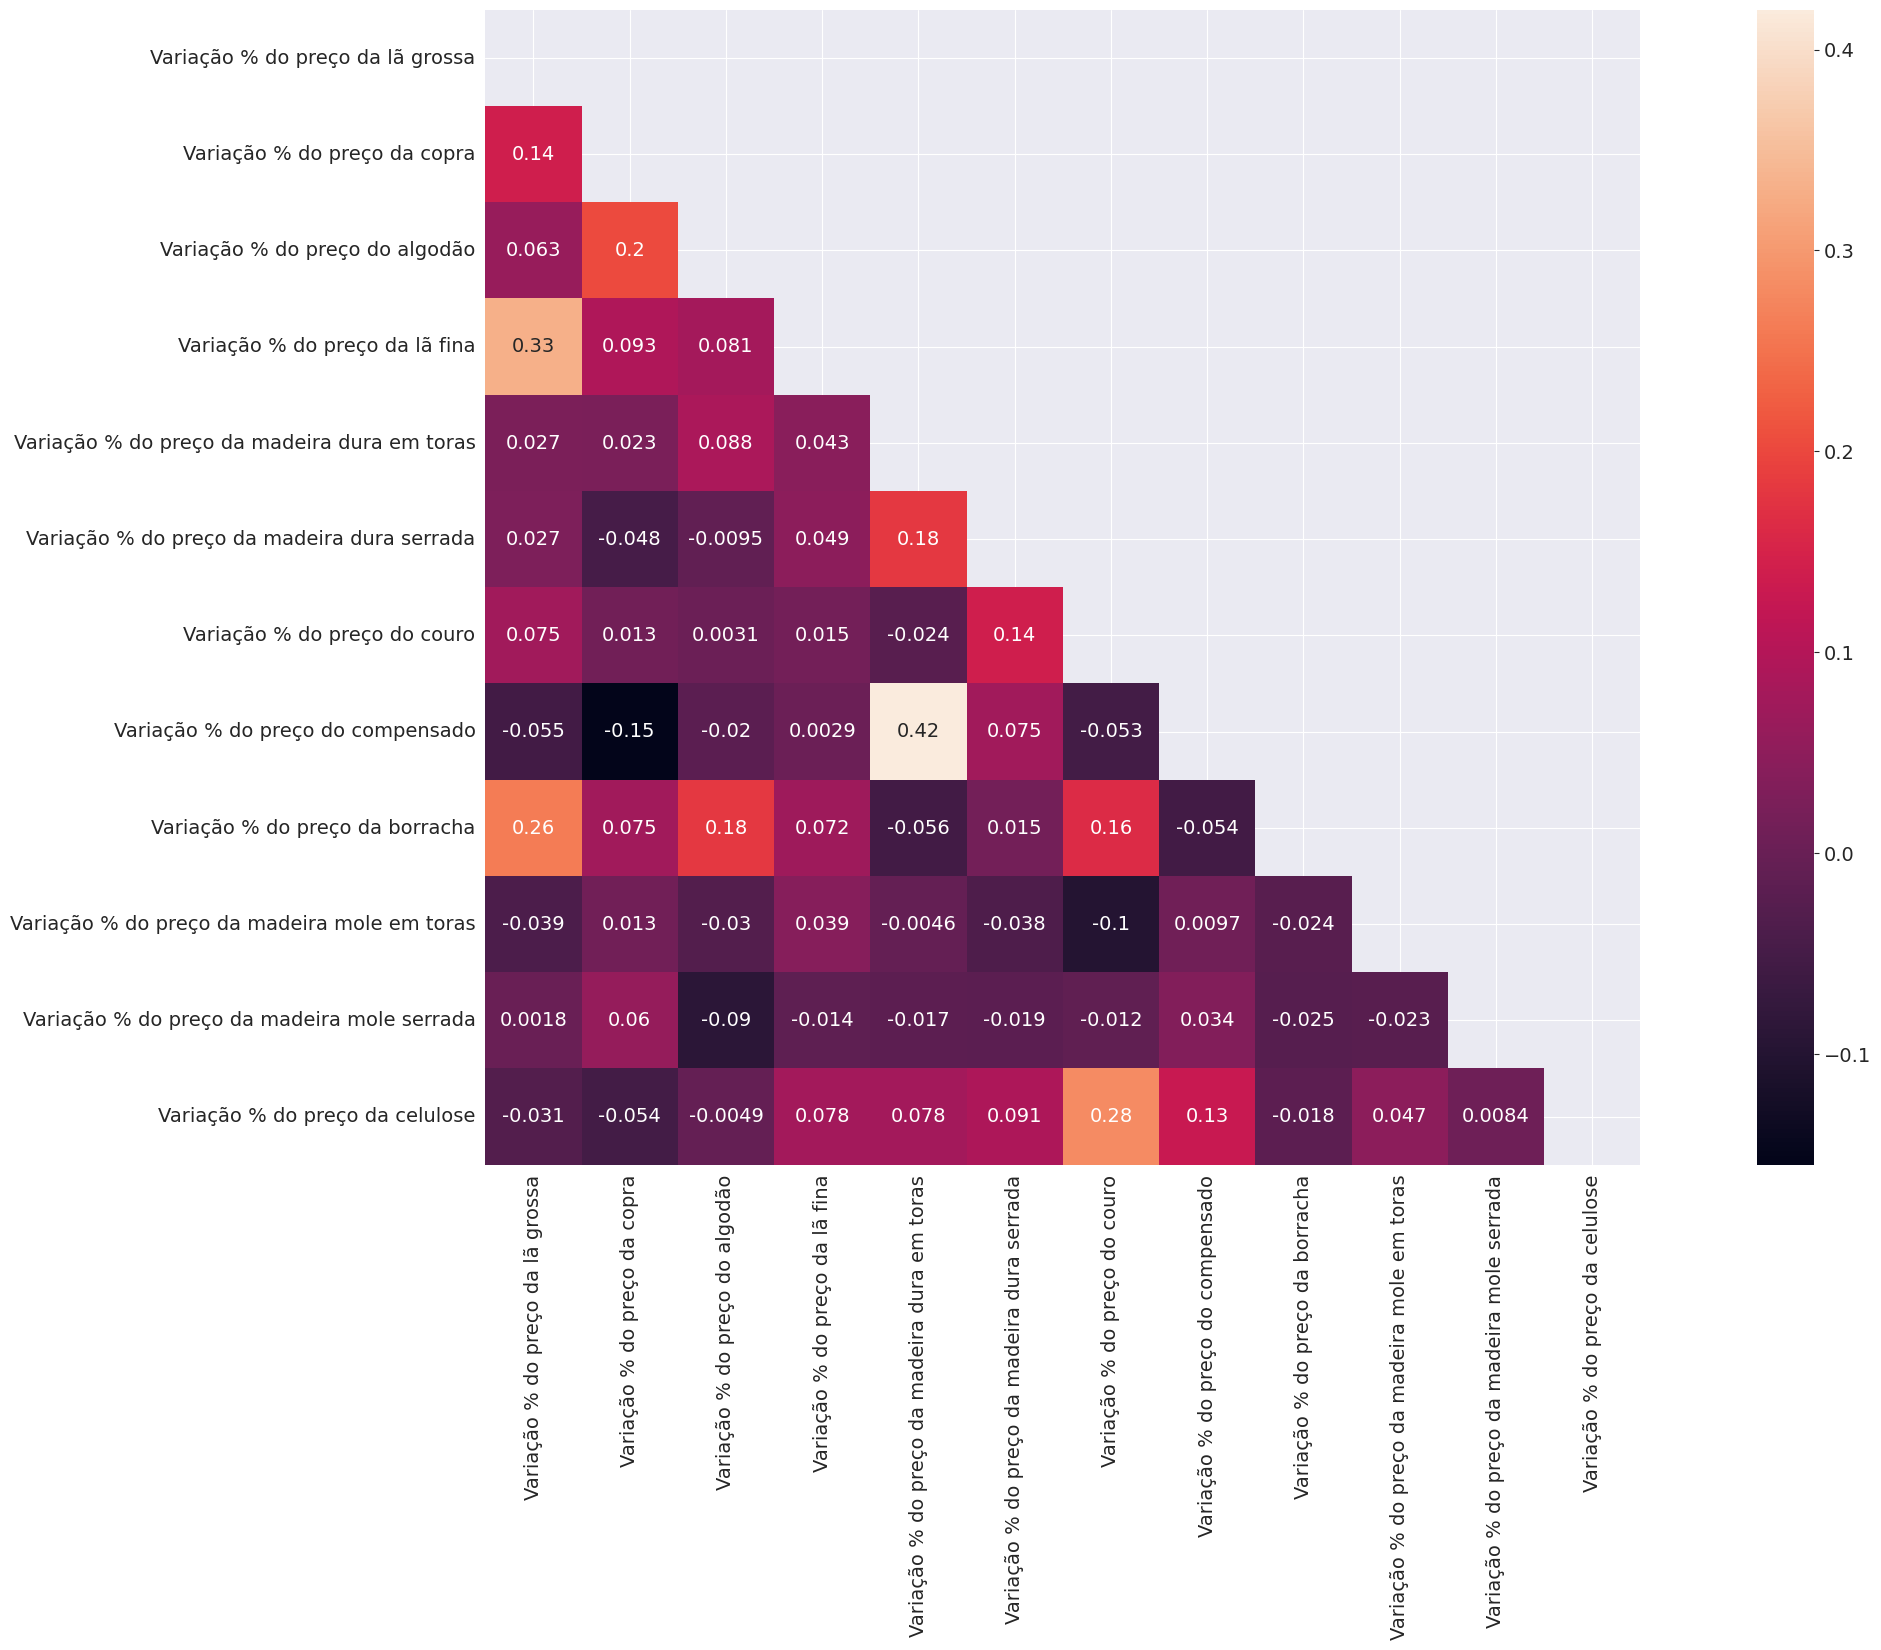

In [ ]:
plt.figure(figsize = (30,15))
changelist = ['Variação % do preço da lã grossa',
    'Variação % do preço da copra',
    'Variação % do preço do algodão',
    'Variação % do preço da lã fina',
    'Variação % do preço da madeira dura em toras',
    'Variação % do preço da madeira dura serrada',
    'Variação % do preço do couro',
    'Variação % do preço do compensado',
    'Variação % do preço da borracha',
    'Variação % do preço da madeira mole em toras',
    'Variação % do preço da madeira mole serrada',
    'Variação % do preço da celulose']

# Gerar uma matriz de correlação para todo conjunto de dados
corrMatrix = df[changelist].corr()
mask = np.triu(np.ones_like(changelist, dtype = bool))
sns.heatmap(corrMatrix, mask = mask, square = True, annot = True)
plt.show()

A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas.

* o valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo);
* Zero implica nenhuma relação;
* Caso contrário, maior o valor maior a chance de relação.
preços e seus gráficos de % de mudança.

## Analisando mais profundamente:

**Lã grossa**

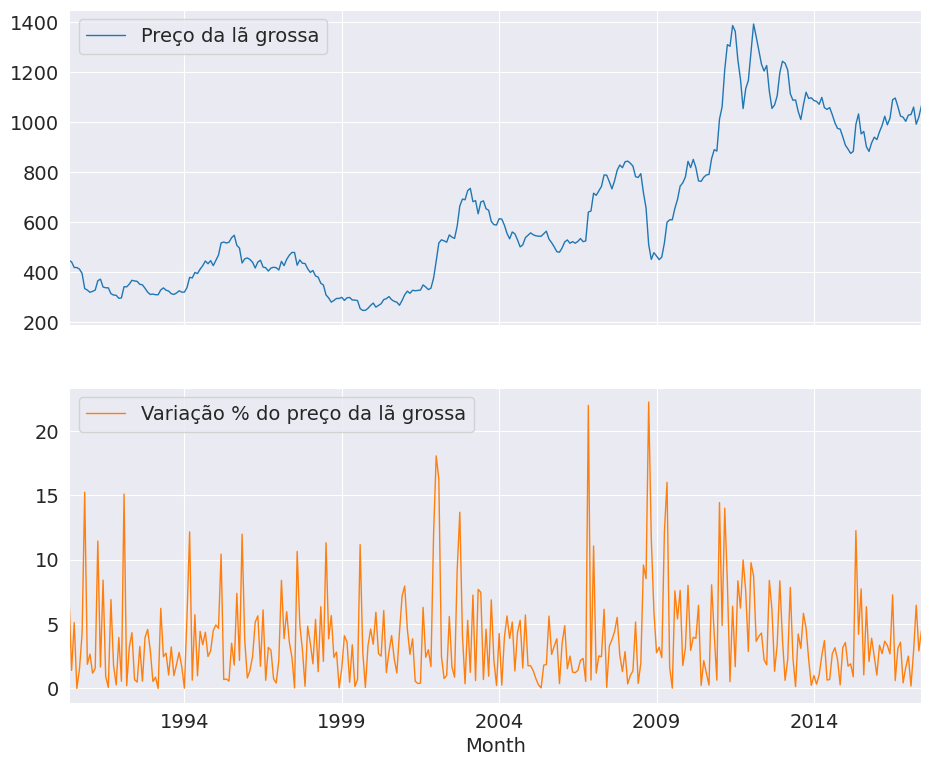

In [ ]:
axes = df[["Preço da lã grossa", "Variação % do preço da lã grossa"]].plot(figsize = (11, 9), subplots = True, linewidth = 1)
# subplots = True >> Aqui conseguimos colocar as imagens com duas métricas separadas. Visto que há diferença na métrica do preço (caso das centenas) e da porcentagem (0-20)
# Quando colocamos ambos gráficos juntos. Há uma grande discrepância pelo valor o que dificulta a leitura dos dados.

Da mesma forma, podemos encontrar a visualização de todos os outros recursos fornecidos no conjunto de dados.

##Fazendo e respondendo perguntas##


### **Q1: Descubra a variação normal do preço de cada matéria-prima.**

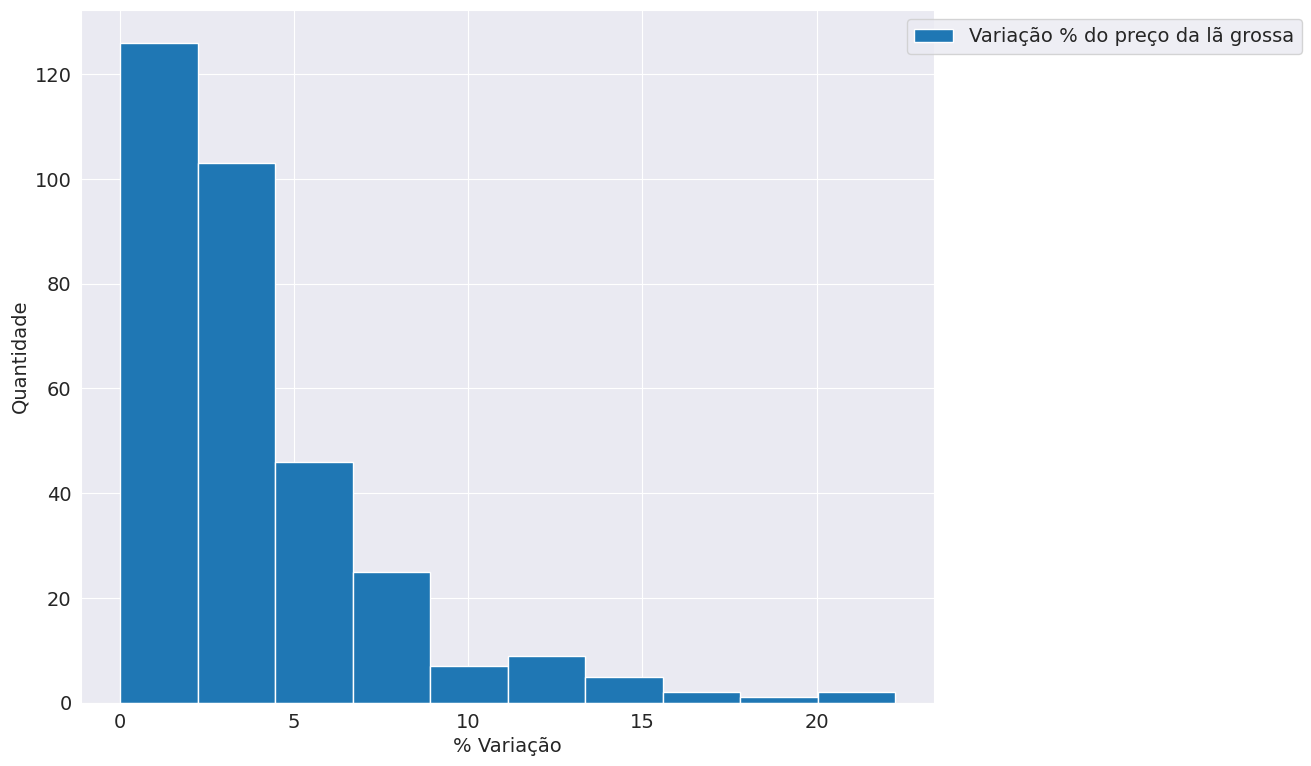

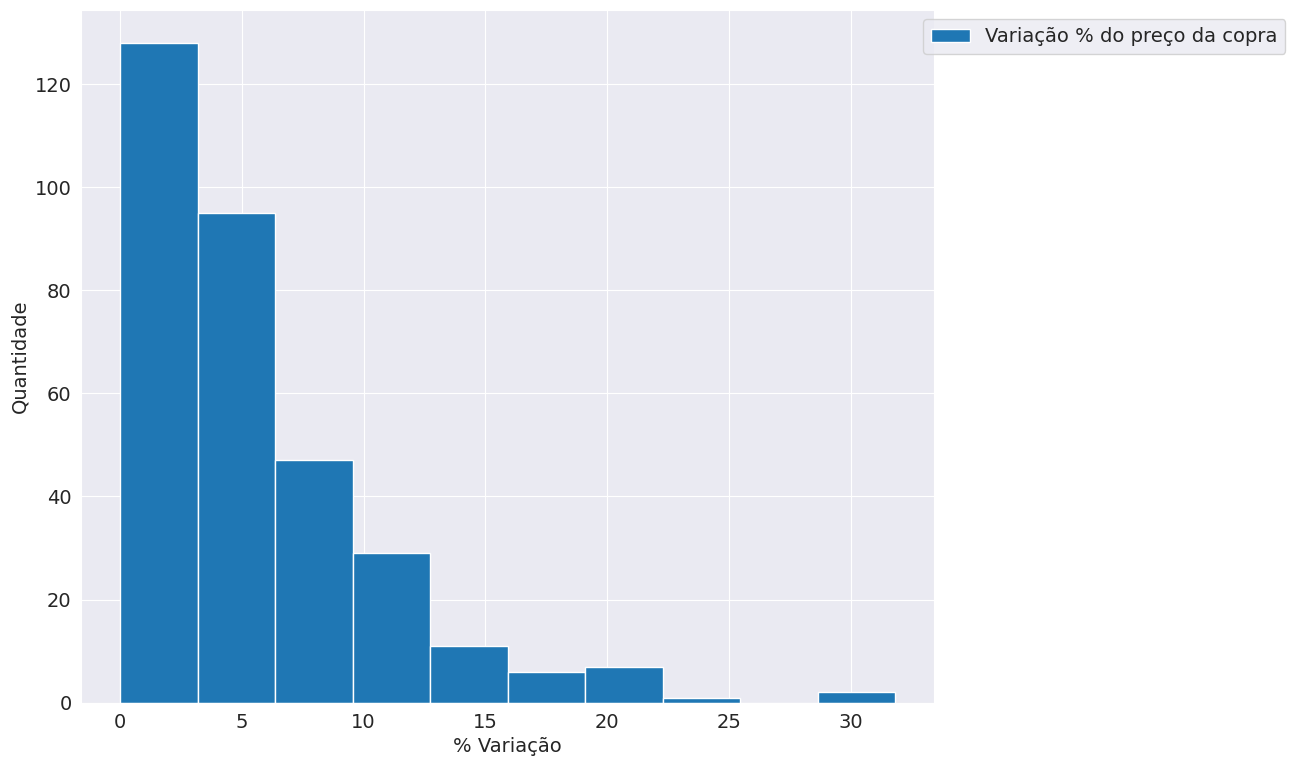

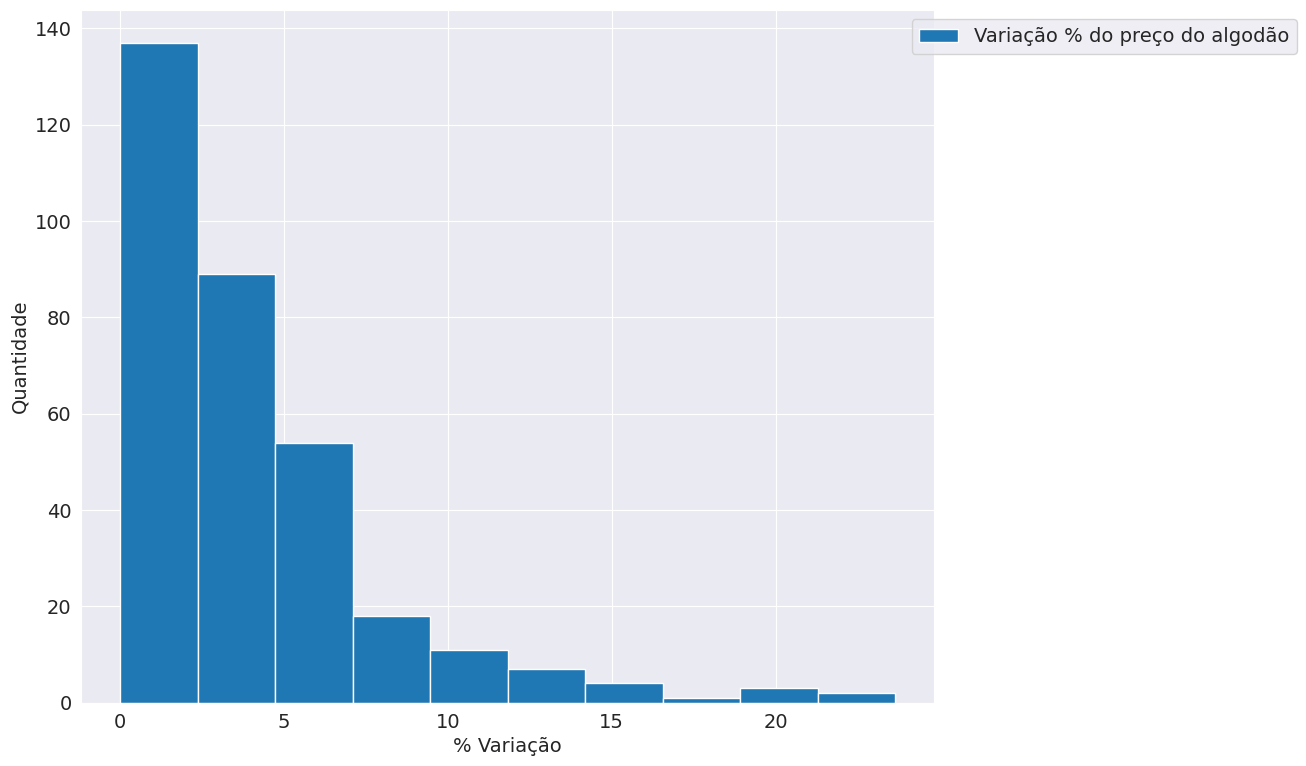

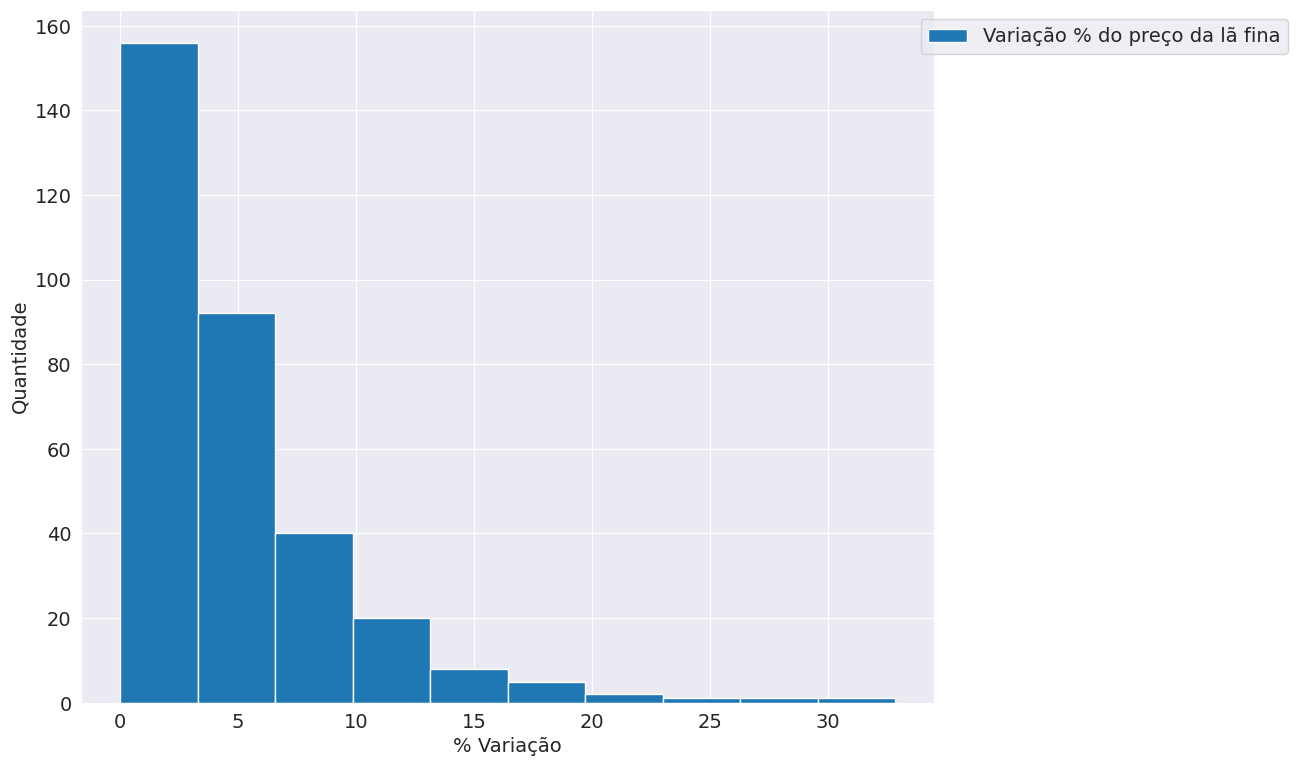

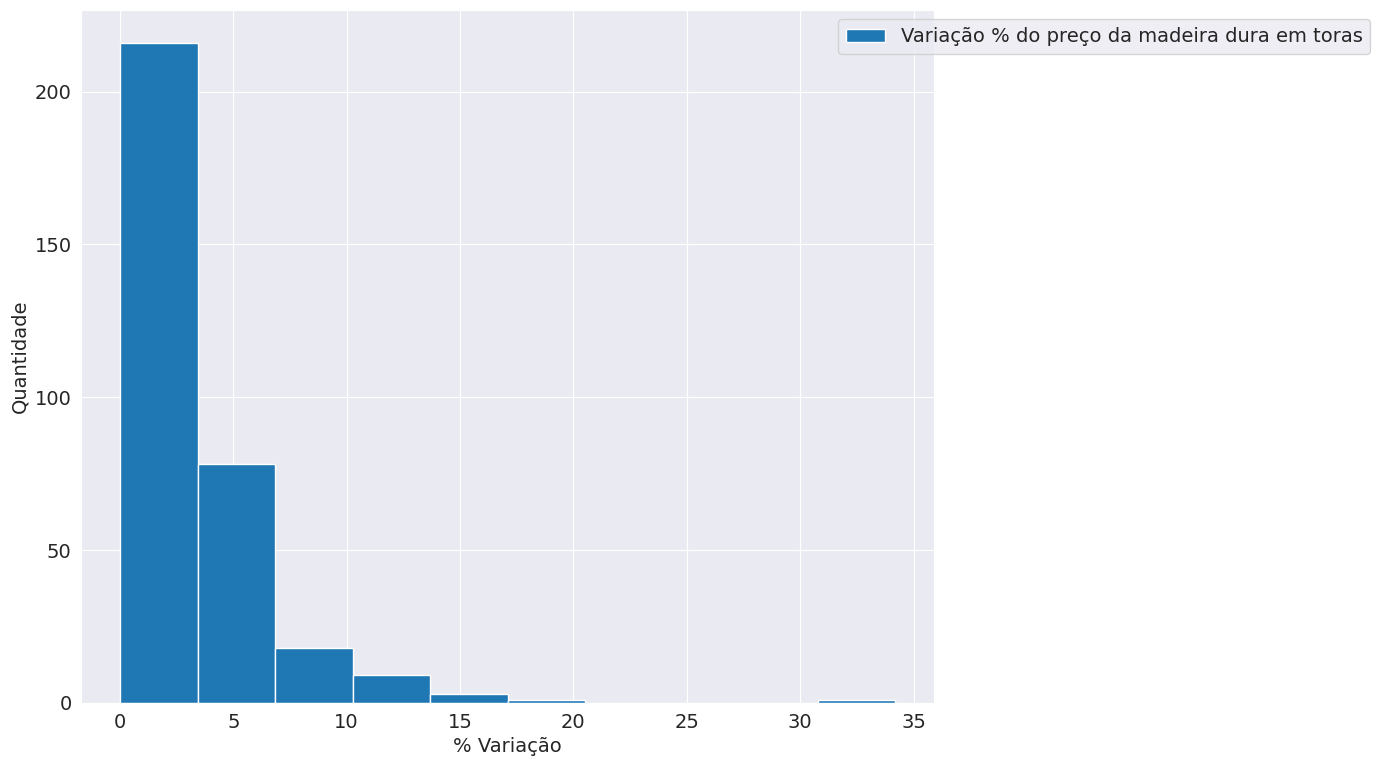

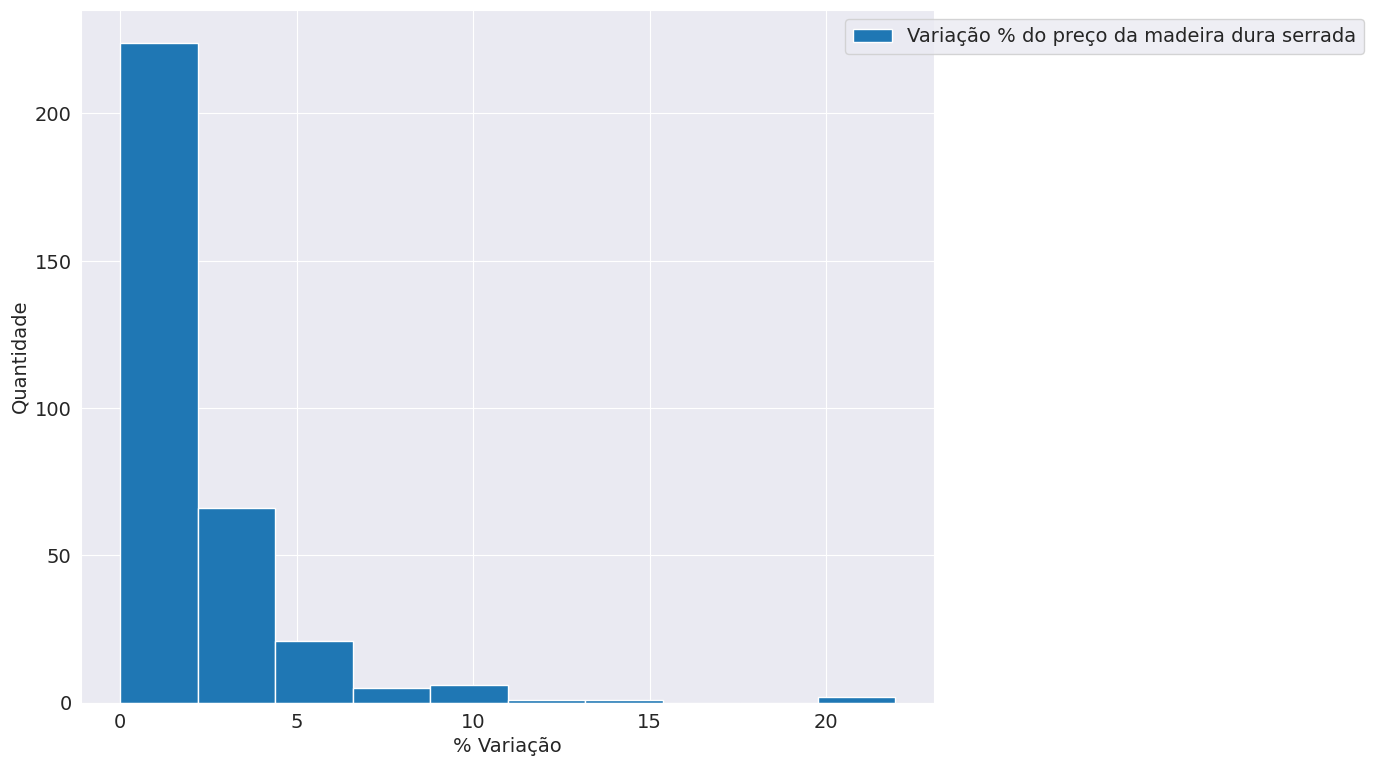

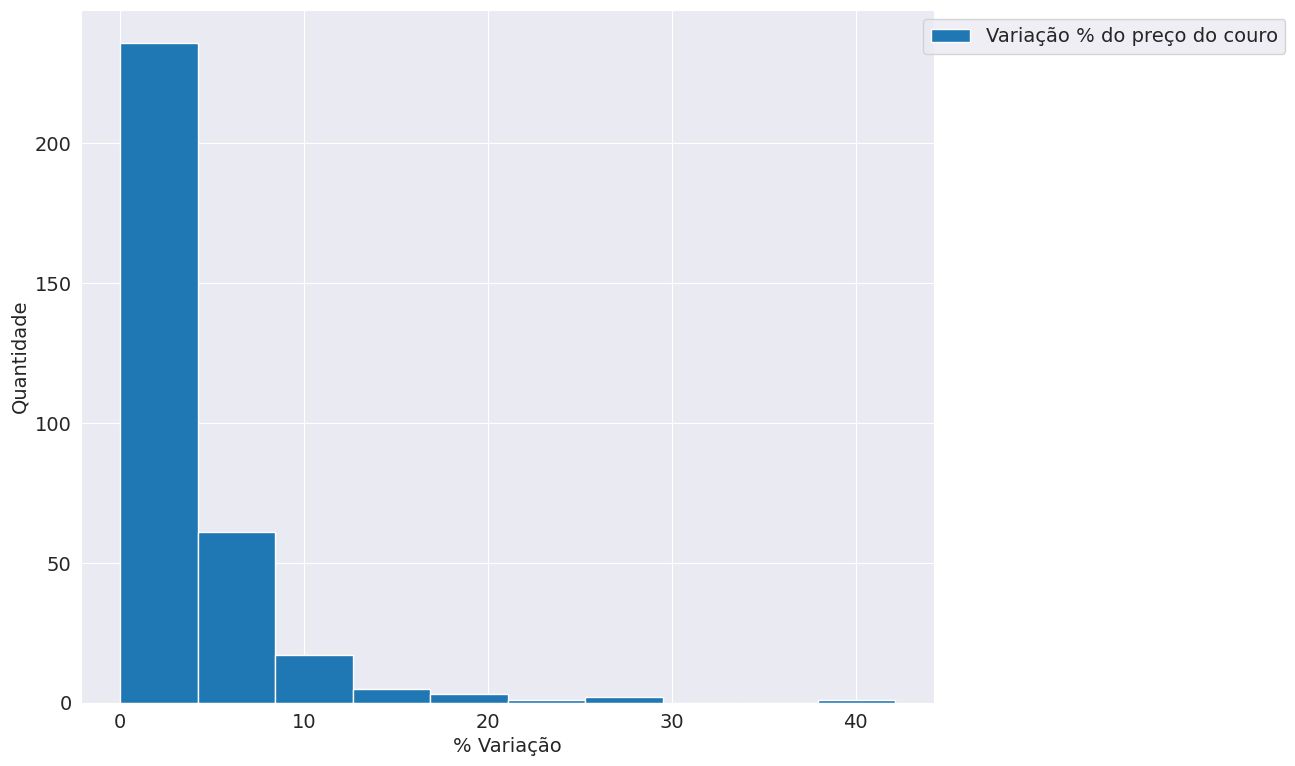

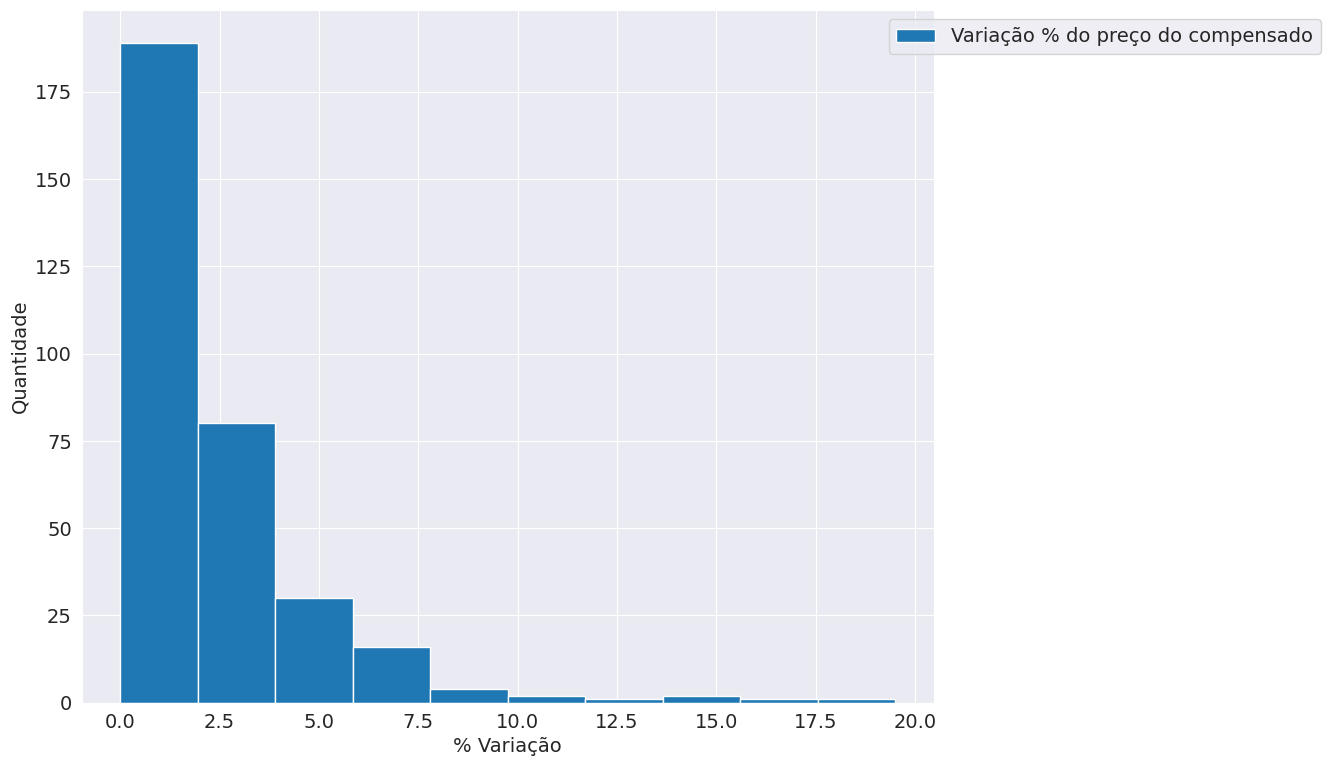

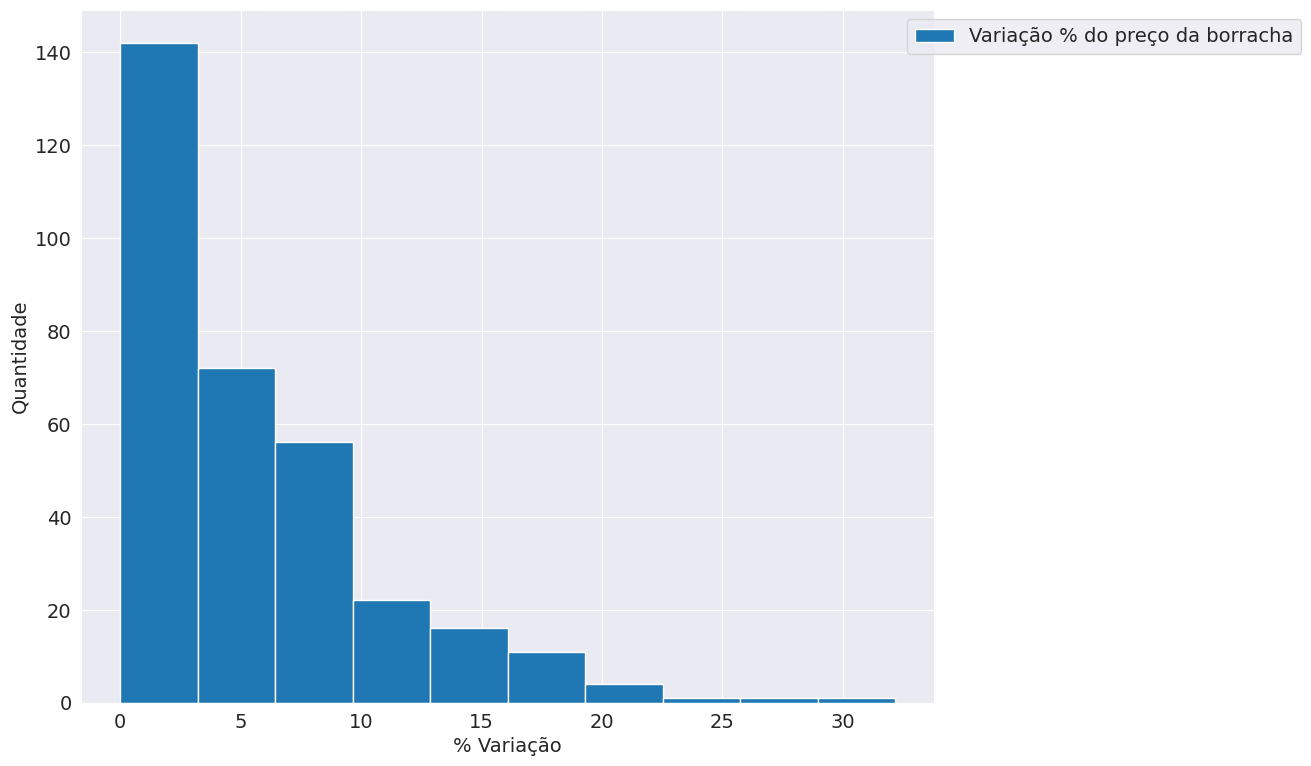

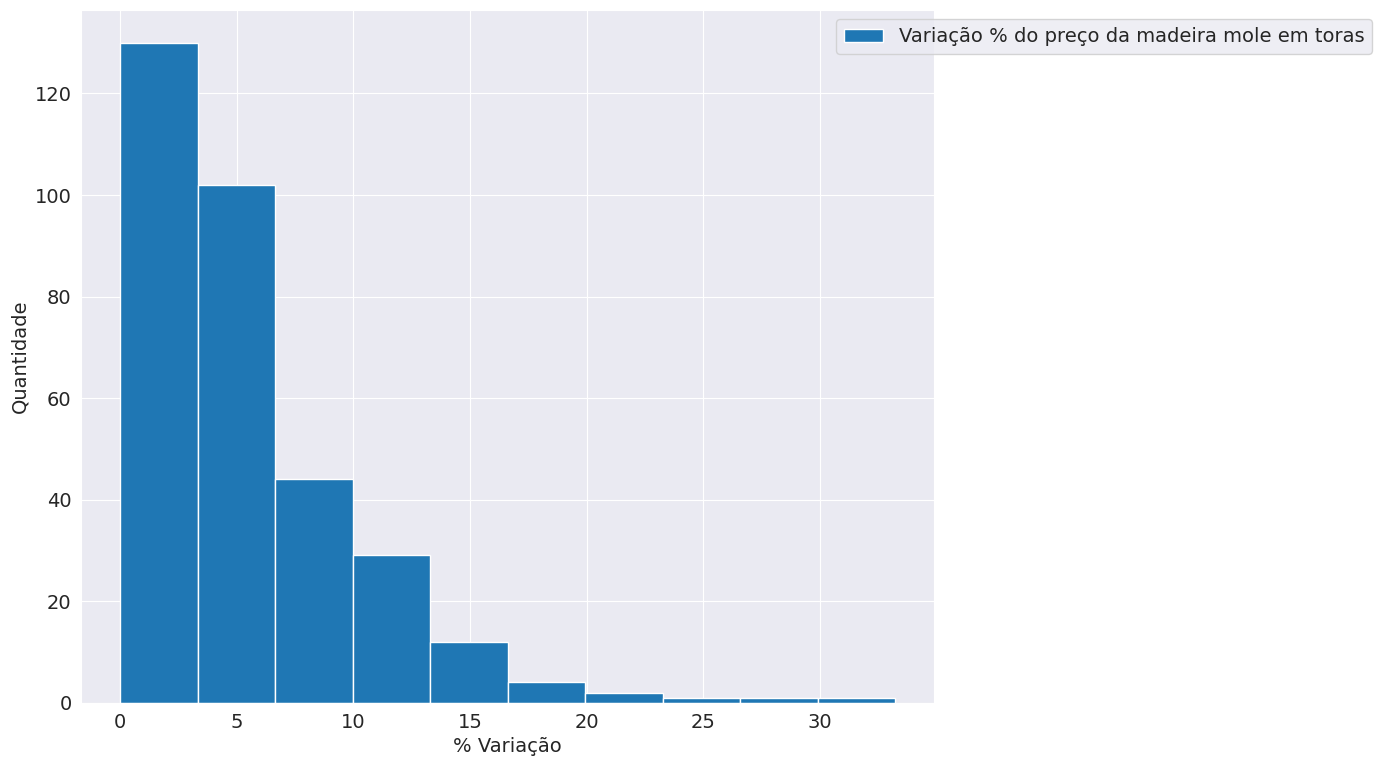

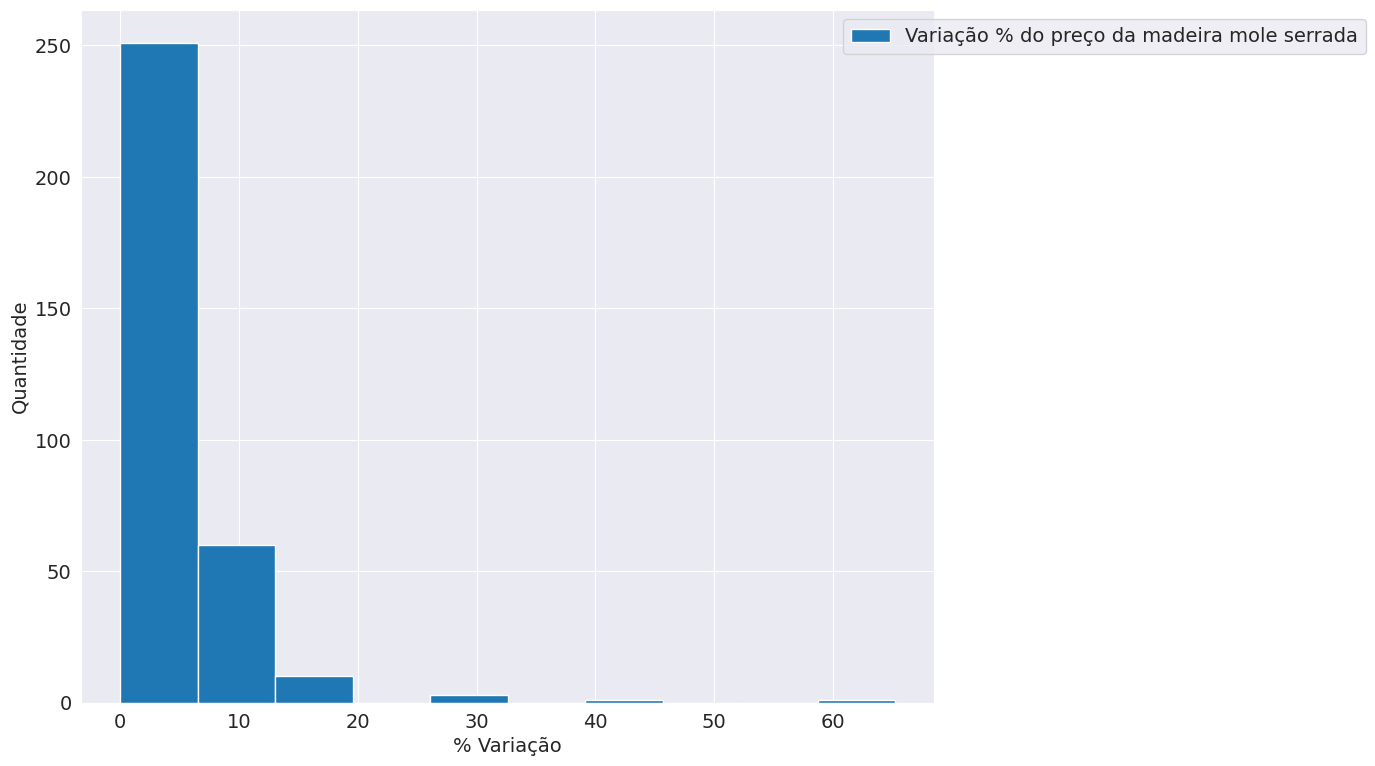

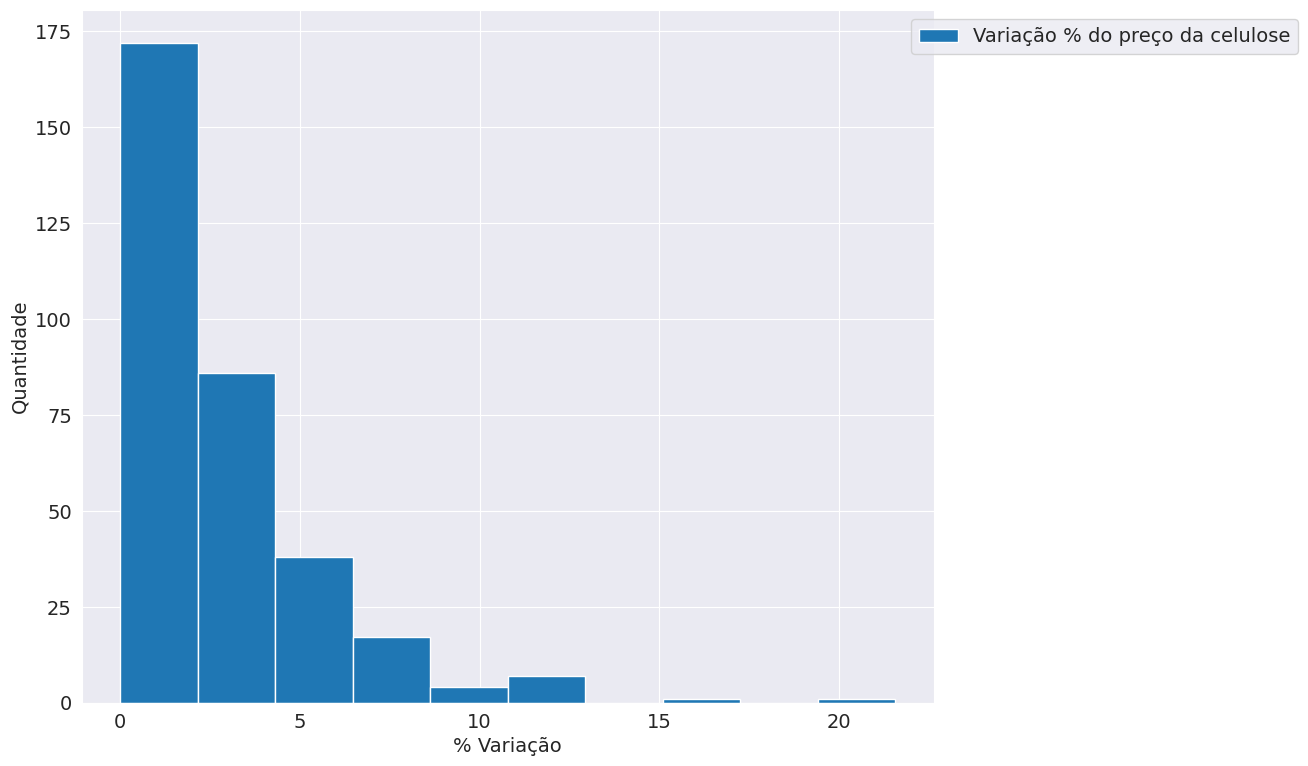

In [ ]:
# df[["Preço da celulose", "Variação % do preço do algodão"]].hist(figsize=(11, 9), linewidth=1)

changelist = ['Variação % do preço da lã grossa',
    'Variação % do preço da copra',
    'Variação % do preço do algodão',
    'Variação % do preço da lã fina',
    'Variação % do preço da madeira dura em toras',
    'Variação % do preço da madeira dura serrada',
    'Variação % do preço do couro',
    'Variação % do preço do compensado',
    'Variação % do preço da borracha',
    'Variação % do preço da madeira mole em toras',
    'Variação % do preço da madeira mole serrada',
    'Variação % do preço da celulose']

for i in range(len(changelist)):
    plt.figure(figsize = (12,12))
    df[changelist[i]].hist(figsize = (11, 9), linewidth = 1)
    plt.xlabel('% Variação')
    plt.ylabel('Quantidade')
    plt.legend(changelist[i:], loc = 'upper center', bbox_to_anchor = (1.2,1))


- Podemos observar que a maioria das matérias-primas tem % Variação frequente ideal inferior a 5%.

- Observamos também como podemos comprar matérias-primas observando a sua variação. Quanto menor variação, melhor.


### **Q2: Encontre a matéria-prima que tem o menor preço ao longo dos anos.**

Text(0.5, 0.98, 'Comparação de preços das Matérias-Primas')

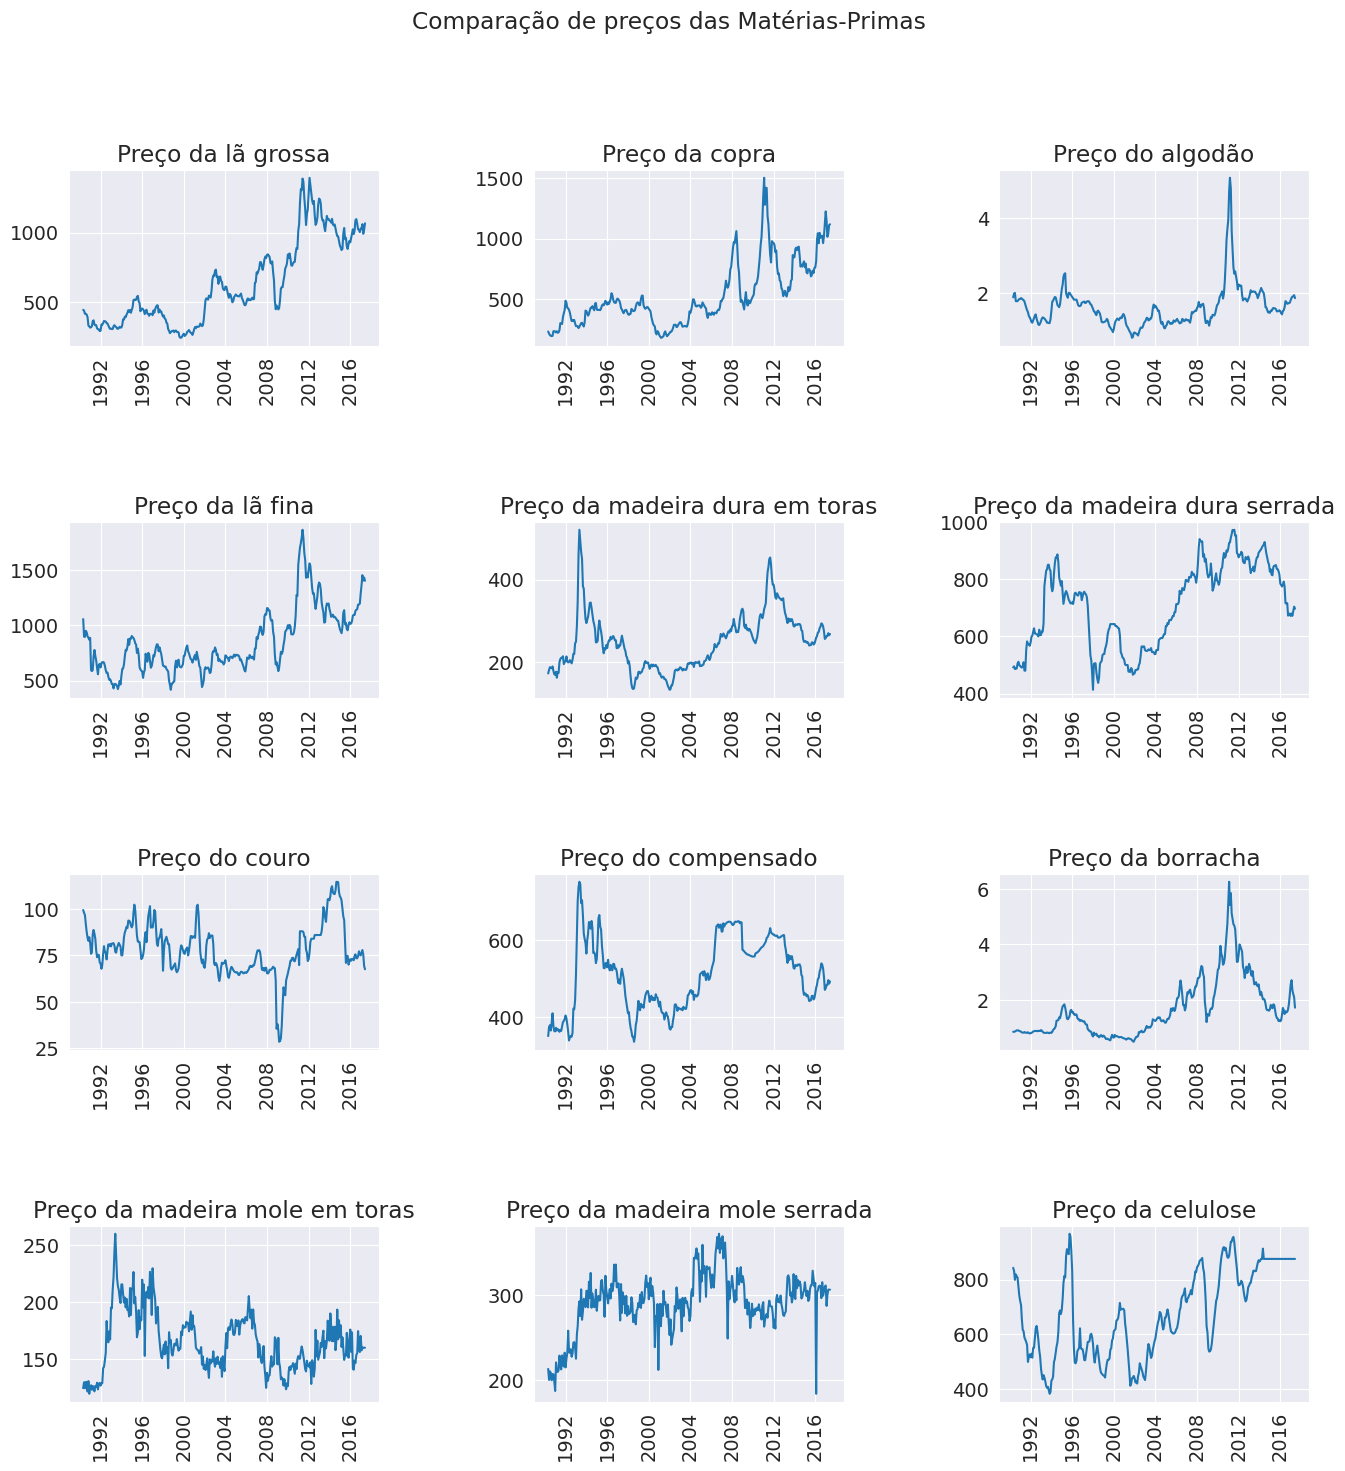

In [ ]:
plt.figure(figsize = (16, 16))
materialslist = ['Preço da lã grossa',
    'Preço da copra',
    'Preço do algodão',
    'Preço da lã fina',
    'Preço da madeira dura em toras',
    'Preço da madeira dura serrada',
    'Preço do couro',
    'Preço do compensado',
    'Preço da borracha',
    'Preço da madeira mole em toras',
    'Preço da madeira mole serrada',
    'Preço da celulose']

for i in range(len(materialslist)):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace = 1, wspace = 0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation = 90)
plt.suptitle("Comparação de preços das Matérias-Primas")

- Podemos ver que o algodão e a borracha são os que tiveram menor variação, por preço, ao longo do tempo visto que seu valor é baixo.
- Observamos também que por volta de 2008-2012, a maioria dos produtos teve um superávit e em outras houve déficit.


Vamos comparar preços do algodão e da borracha para entender melhor qual é o mais baixo.

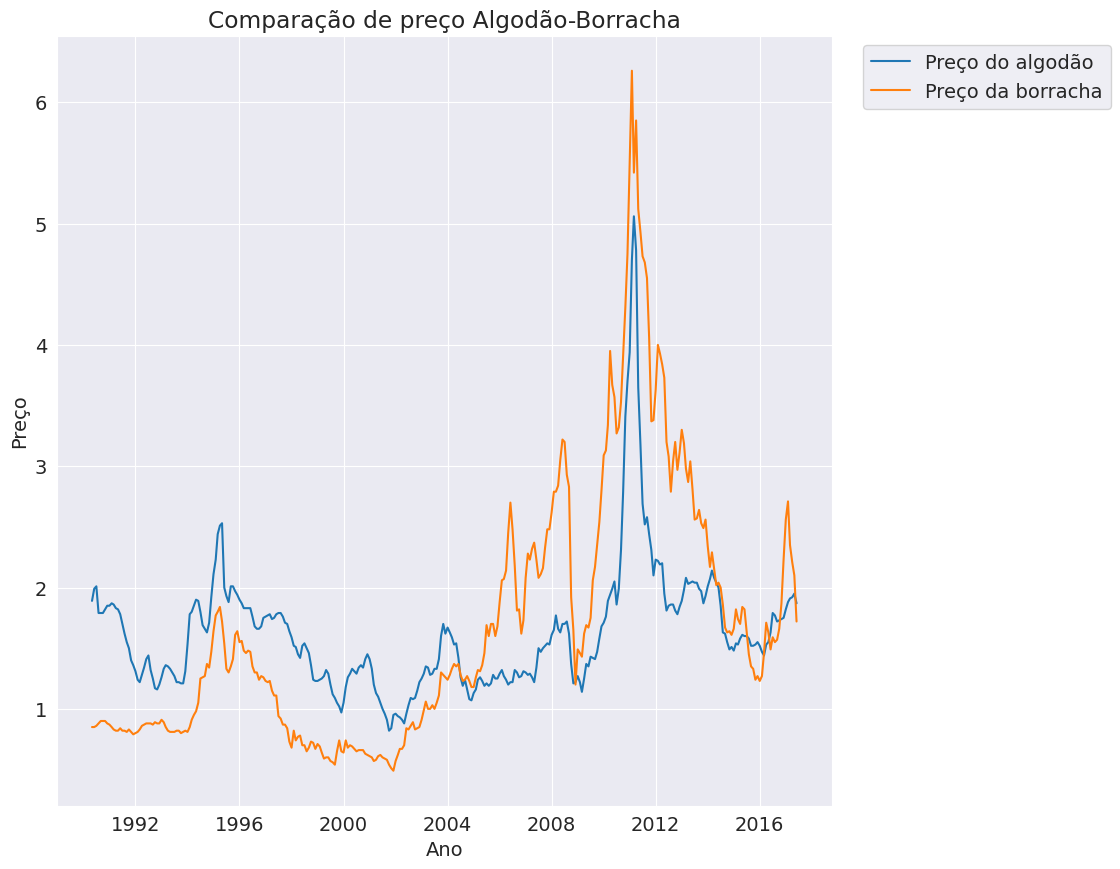

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(df[['Preço do algodão','Preço da borracha']])
plt.title("Comparação de preço Algodão-Borracha")
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend(['Preço do algodão', 'Preço da borracha'], loc = 'upper center', bbox_to_anchor = (1.2,1))

- O **Algodão** é matéria-prima de menor preço nos últimos anos.

- Tanto o algodão quanto a borracha são materiais de baixo preço.

- Antes de 2004 temos um valor maior agregado no algodão, porém, após este ano, temos um superávit do preço da borracha que perdura até hoje.

### Plotando num gráfico todas as variações dos preços de cada matéria-prima

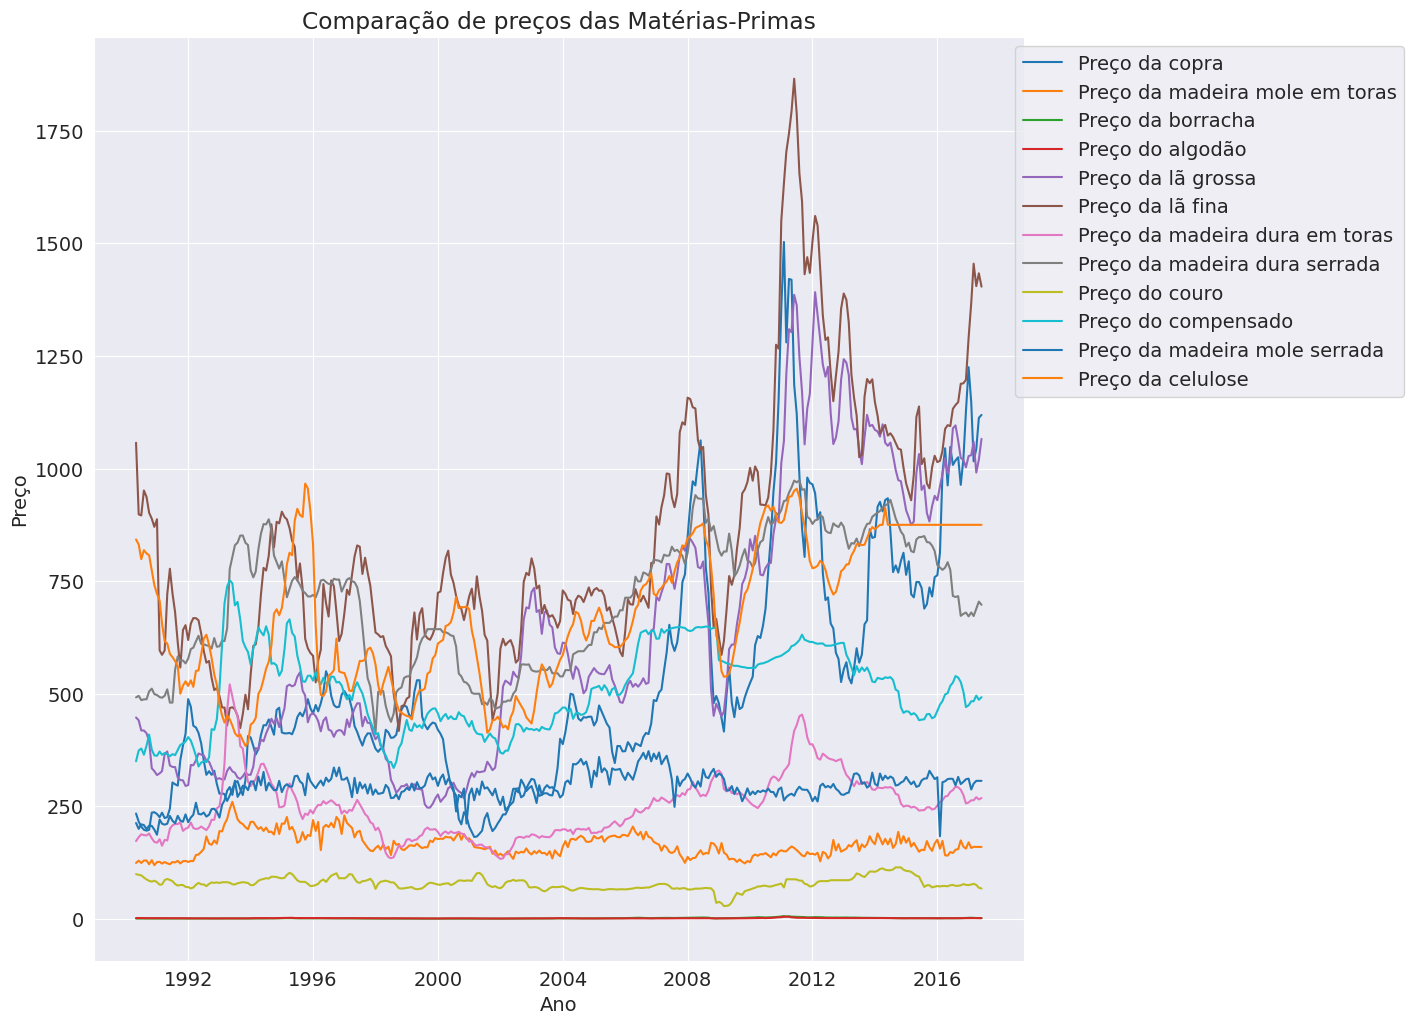

In [ ]:
plt.figure(figsize = (12, 12))
plt.plot(df[['Preço da copra','Preço da madeira mole em toras','Preço da borracha','Preço do algodão','Preço da lã grossa','Preço da lã fina','Preço da madeira dura em toras','Preço da madeira dura serrada','Preço do couro','Preço do compensado','Preço da madeira mole serrada','Preço da celulose']])
plt.title("Comparação de preços das Matérias-Primas")
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend(['Preço da copra', 'Preço da madeira mole em toras', 'Preço da borracha', 'Preço do algodão', 'Preço da lã grossa', 'Preço da lã fina', 'Preço da madeira dura em toras', 'Preço da madeira dura serrada', 'Preço do couro', 'Preço do compensado', 'Preço da madeira mole serrada', 'Preço da celulose'], loc='upper center', bbox_to_anchor=(1.2,1))

- Materiais de baixo preço: algodão, couro, softlog, log duro, preço de madeira serrada macia, borracha

- Materiais de alto preço: lã grossa,copra,lã fina,madeira serrada dura,pasta de madeira,madeira compensada



### **Q3: Qual matéria-prima tem a maior e menor variação de % de preço?**

In [ ]:
import random as random

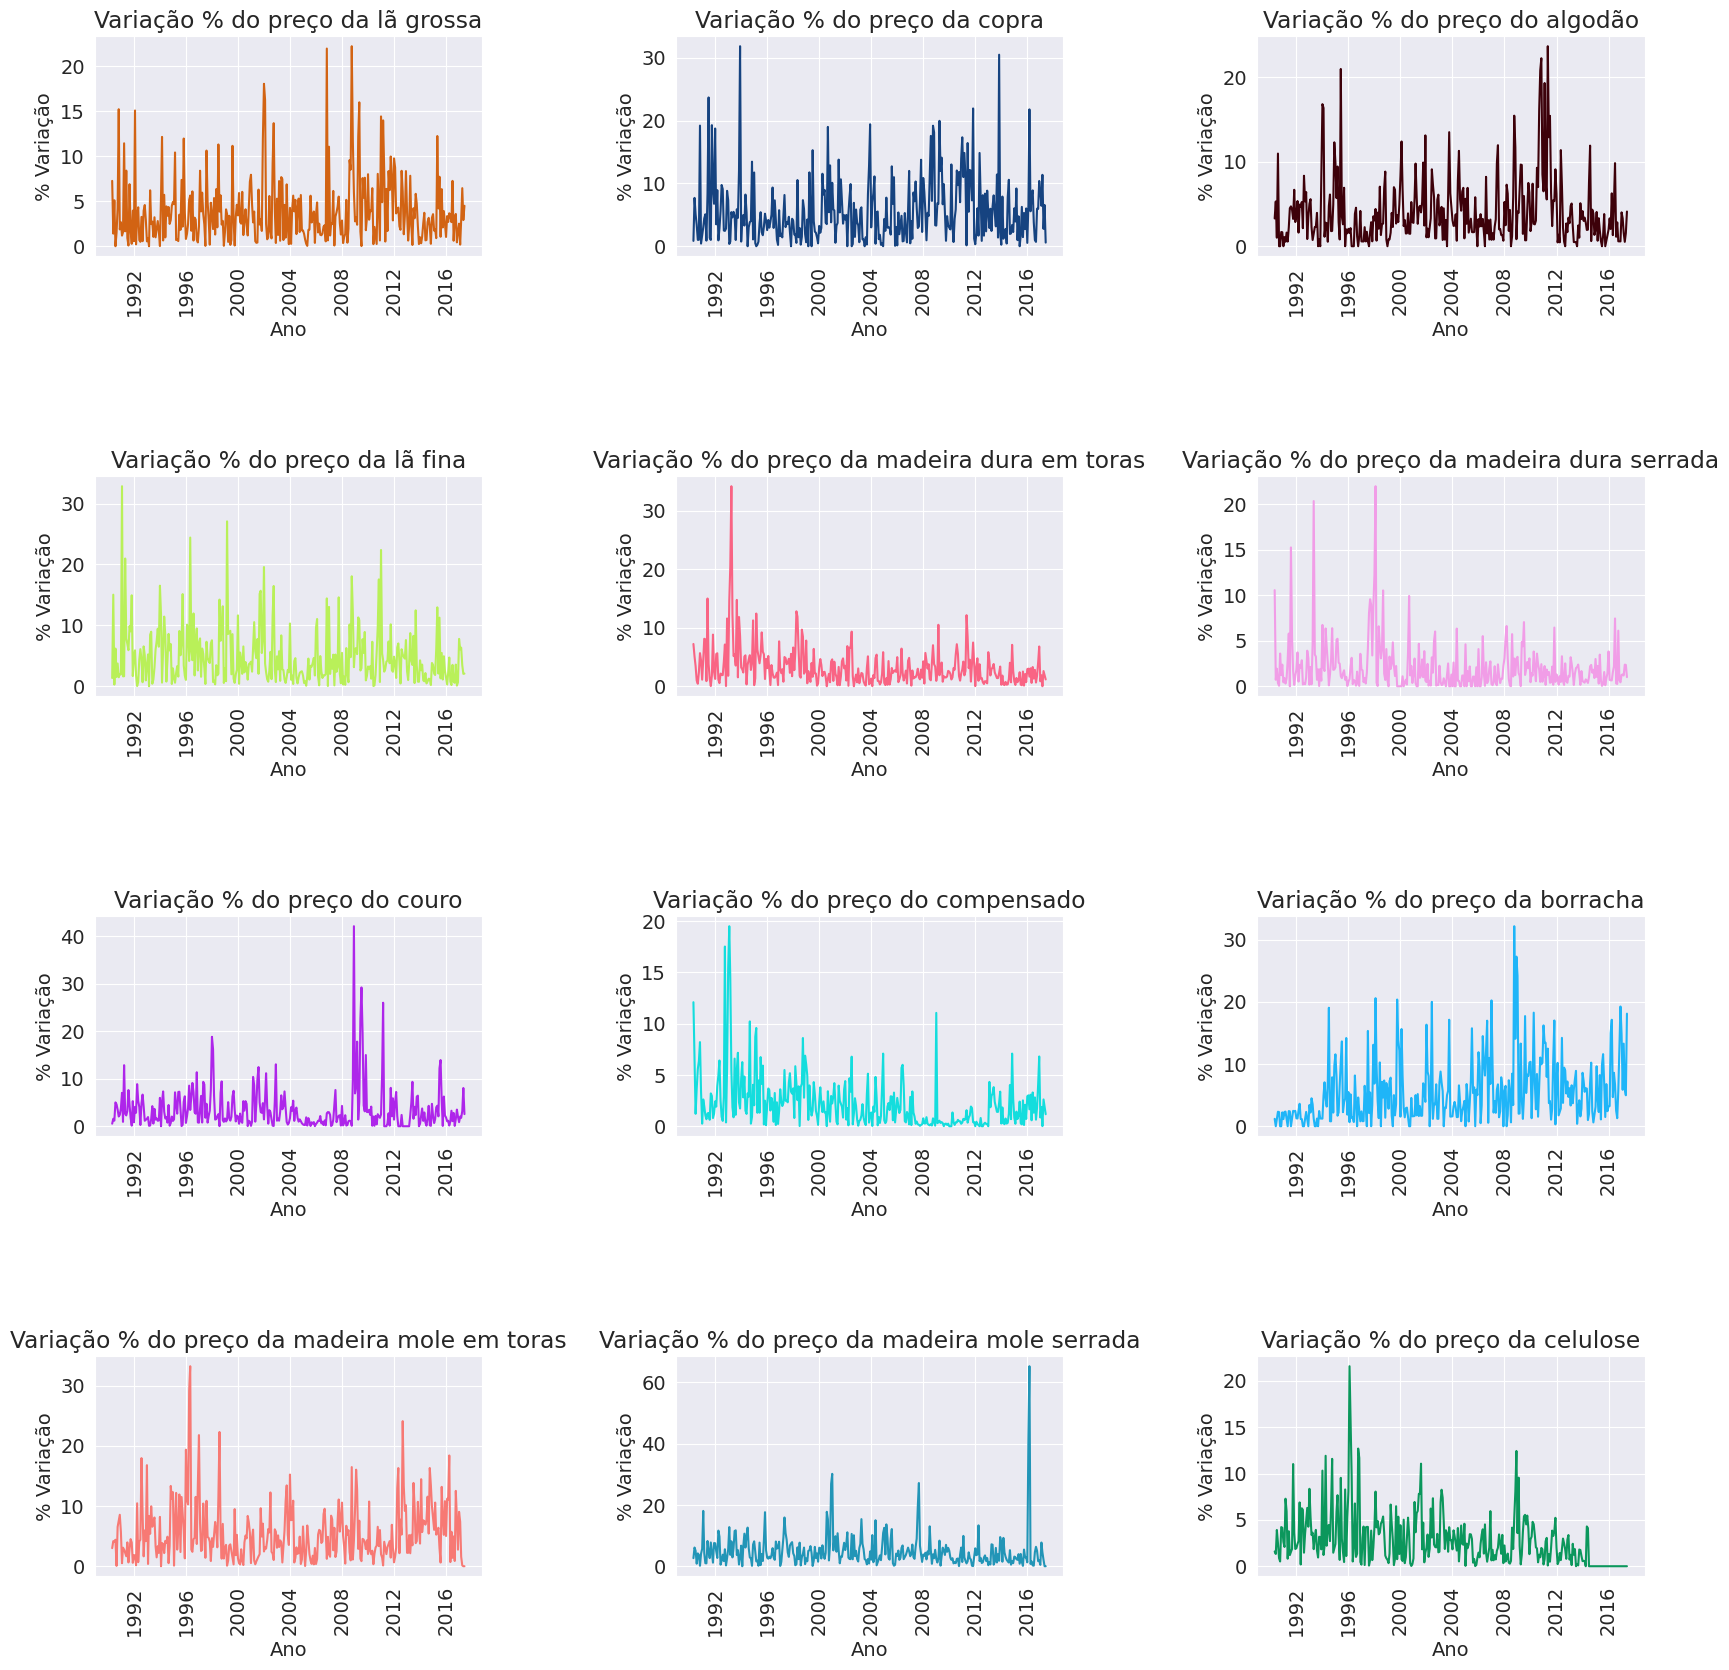

In [ ]:
# lowchangelist = ['Variação percentual do preço do algodão','Variação % do preço do couro','Variação % do preço da madeira mole em toras','Variação % do preço da madeira dura em toras','	Variação % do preço da madeira mole serrada','Variação % do preço do compensado']

plt.figure(figsize = (20, 20))
for i in range(len(changelist)):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4, 3, i + 1)
    plt.subplots_adjust(hspace = 1 ,wspace = 0.5)
    plt.plot(df[changelist[i]], c = color)
    plt.xticks(rotation = 90)
    plt.title(changelist[i])
    plt.xlabel('Ano')
    plt.ylabel('% Variação')

# plt.legend(changelist[i:], loc = 'upper center', bbox_to_anchor = (1.2,1))

- Podemos ver a maior % de variação para madeira serrada macia (em mais de 60 no ano de 2016) e a menor % de variação é para madeira compensada (menos de 20).

### **Q4: Encontre as matérias-primas com mudança drástica de preço**

Fazemos a apresentação dos dados em dois gráficos mudando os eixos a fim de obter uma melhor visualiação dos dados.

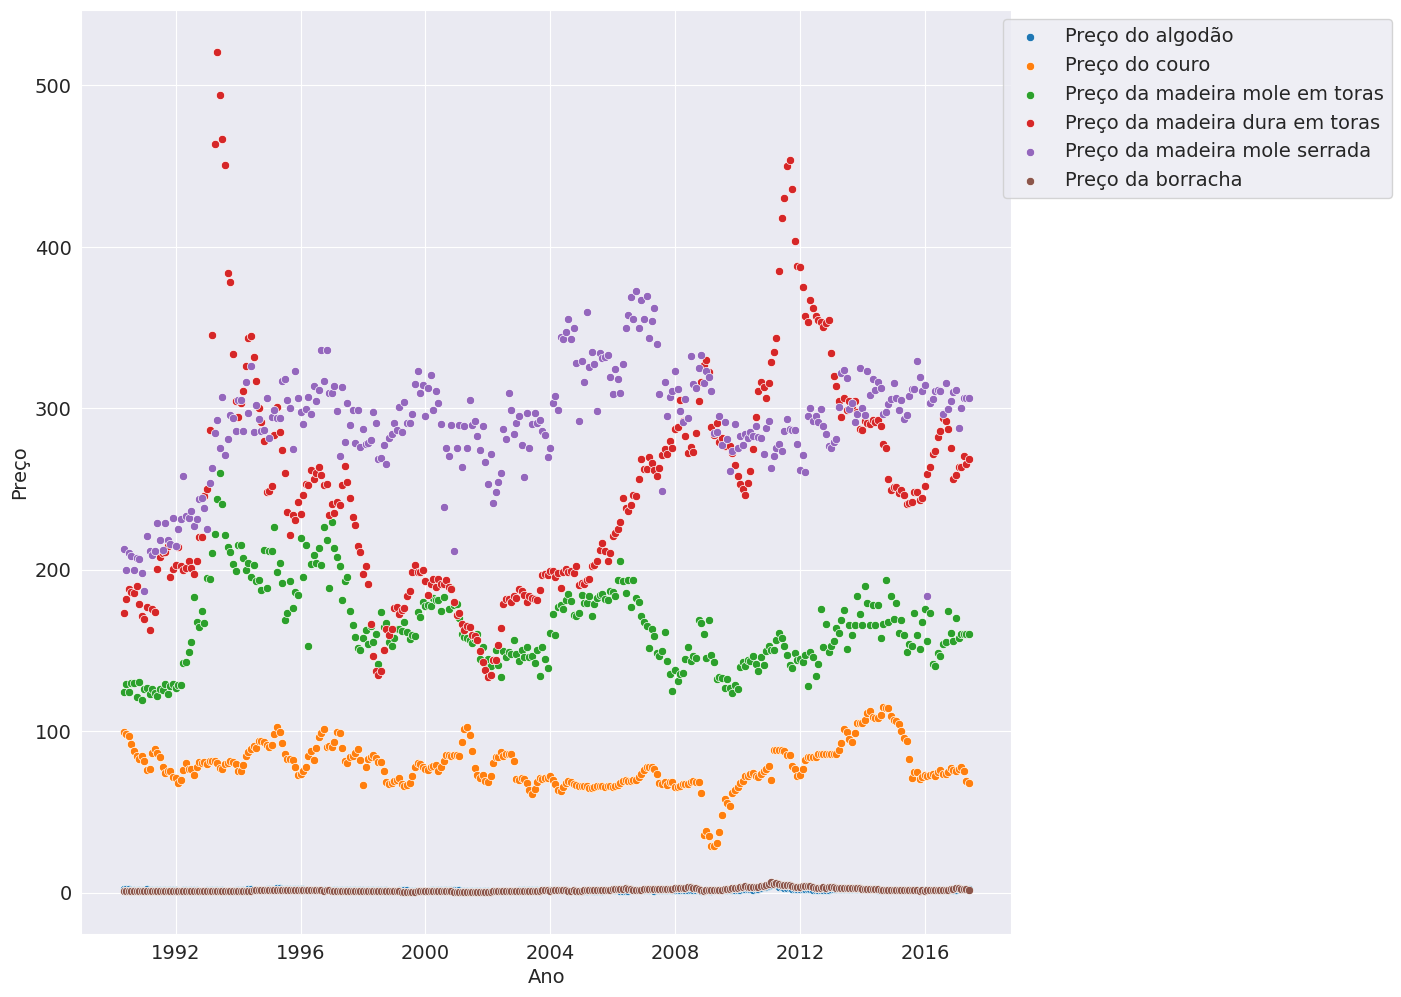

In [ ]:
#plt.figure(figsize=(12,12))

#sns.scatterplot(df['Preço do algodão'], df.index, hue = df['Preço da lã fina']);
lowlist=['Preço do algodão','Preço do couro','Preço da madeira mole em toras','Preço da madeira dura em toras','Preço da madeira mole serrada','Preço da borracha']
plt.figure(figsize = (12,12))
plt.ylabel('Preço')
plt.xlabel('Ano')

#plt.legend(lowlist, loc = 'upper center', bbox_to_anchor = (1.2,1))
for i in range(len(lowlist)):
    sns.scatterplot(y = df[lowlist[i]], x = df.index);
    plt.legend(lowlist,loc='upper center', bbox_to_anchor = (1.2,1))

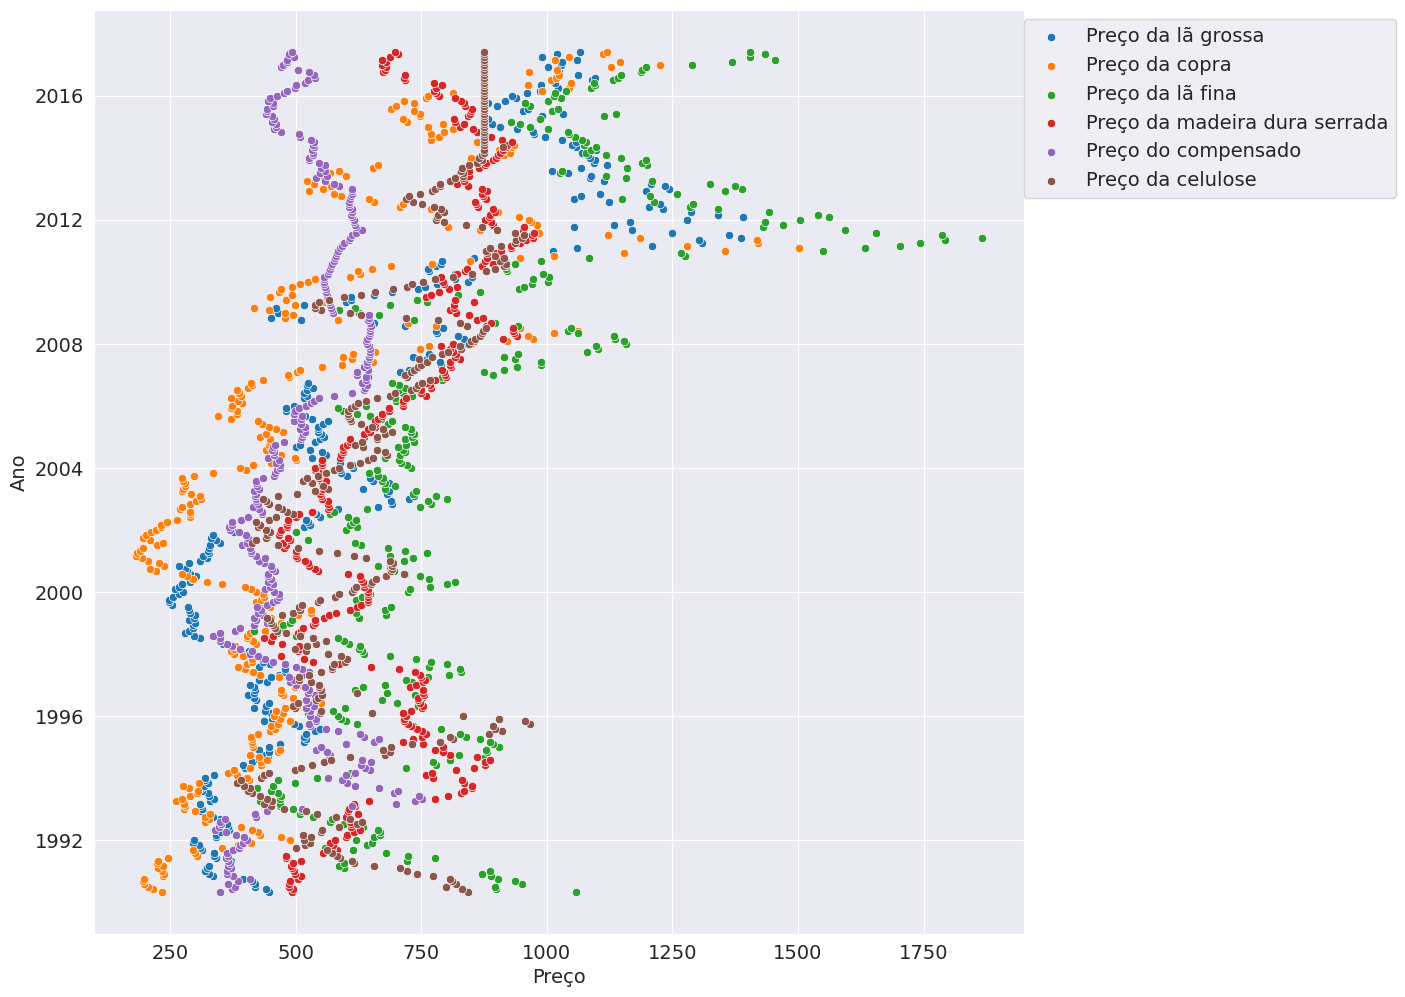

In [ ]:
#plt.figure(figsize=(12,12))

#sns.scatterplot(df['Preço do algodão'],df.index,hue=df['Preço da lã fina']);

#lowlist=['Preço do algodão','Preço do couro','Preço da madeira mole em toras','Preço da madeira dura em toras','Preço da madeira mole serrada','Preço do compensado']
highlist=['Preço da lã grossa','Preço da copra','Preço da lã fina','Preço da madeira dura serrada','Preço do compensado','Preço da celulose']

#lowchangelist=['Variação percentual do preço do algodão','Variação % do preço do couro','Variação % do preço da madeira mole em toras','Variação % do preço da madeira dura em toras','	Variação % do preço da madeira mole serrada','Variação % do preço do compensado']
plt.figure(figsize = (12,12))
plt.xlabel('Preço')
plt.ylabel('Ano')
for i in range(len(highlist)):
    sns.scatterplot(x = df[highlist[i]], y = df.index);
    plt.legend(highlist, loc = 'upper center', bbox_to_anchor = (1.2,1))

- Material de baixo preço: mudança bruta de preço em madeira dura em toras.
- Material de alto preço: mudança bruta de preço em lã fina.

### **Q5: Descobrir a faixa de preço de matérias-primas de baixo preço.**

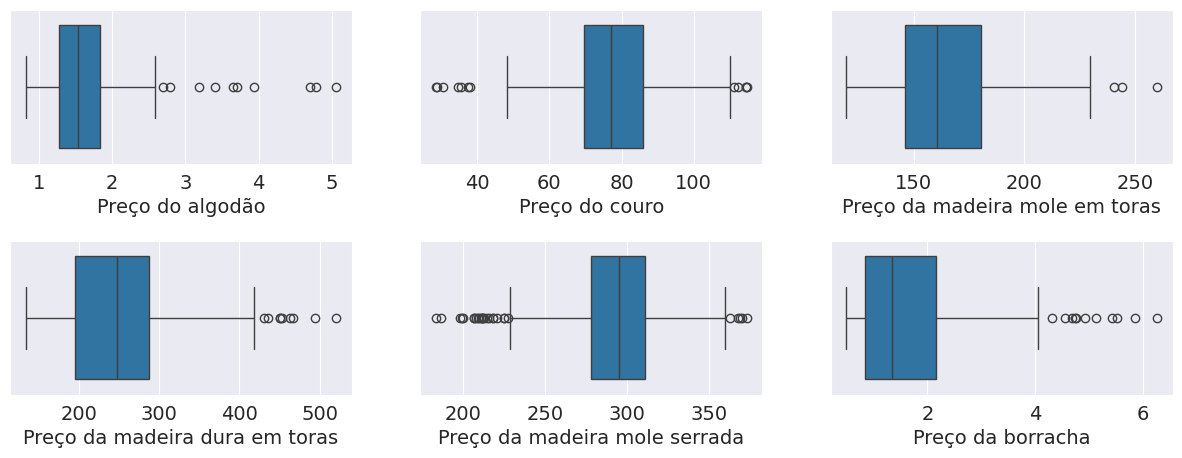

In [ ]:
plt.figure(figsize = (15, 5))
lowlist = ['Preço do algodão', 'Preço do couro', 'Preço da madeira mole em toras', 'Preço da madeira dura em toras', 'Preço da madeira mole serrada', 'Preço da borracha']
for i in range(6):
    #plt.title(lowlist[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.boxplot(x = df[lowlist[i]])

- O quadrado é onde se concentra o maior volume dos dados.
- A linha no quadrado é a mediana.

Inclui: O intervalo interquartil está entre Q3 e Q1 mínimo, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e máximo e outliers


## Inferências (insights) e Conclusão
* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
* Alta e baixa % de variação dos materiais.
* Pudemos identificar a % variação de preços ao longo dos anos.
* Correlação entre eles usando um mapa de calor


## Aplicações
*  Poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.

*  Também podemos prever os preços das matérias-primas analisando os anos anteriores.

* Prevendo a variação de preços poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.